## Gene Set Enrichment Analysis for AD Risk Genes
Author: Ru Feng and Jenny Empawi

### Motivation 
Perform gene set enrichment analysis for AD risk genes identified via xQTL. Highlight the pathway enrichment for novel genes to uncover new insights.

### Implementation
This notebook shows pathway enrichment analysis for the identified AD risk genes which includes:
* Real GVC list - 20 genes from GVC Table 2 (GO enrichment only)
* GVC list 1 - 76 genes (GO enrichment only)
* Strong list - overlapped between xQTL, GVC and TWAS (GO enrichment only)
* xQTL list (GO and KEGG enrichment)
* xQTL only list (GO and KEGG enrichment)
* TWAS only list (GO enrichment only)
* multi gene case - YPEL3, NBEAL1 (GO and KEGG enrichment for YPEL3; no KEGG plot because only one pathway enriched)

#### Load libraries

In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(data.table)
library(tidyverse)
library(STRINGdb)
library(pathview)
library(png)
library(grid)



clusterProfiler v4.12.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, r

#### Load gene and TWAS list

In [2]:
gene_list <- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_genes_FunGen_AD_GVC_xQTL_20250325.tsv")  #FIXME
twas_list <- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_genes_FunGen_AD_twas_GVC_xQTL_20250325.tsv")  #FIXME

#### Real GVC list - 20 genes from GVC table 2

In [3]:
# Load real gvc list
real_gvc_list <- gene_list %>% filter(str_detect(data_resources, 'ADSP_GVC')) # 20 genes from GVC table2

In [4]:
# Run GO enrichment analysis for Biological Process (BP)
ego <- enrichGO(
  gene          = real_gvc_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)

# View results
head(ego)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,9/21,85/21288,4.713703e-17,7.188397e-14,3.349210e-14,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000143801/ENSG00000288674,9
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,9/21,114/21288,7.311827e-16,5.510498e-13,2.567445e-13,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000143801/ENSG00000288674,9
GO:0034205,GO:0034205,amyloid-beta formation,8/21,66/21288,1.084032e-15,5.510498e-13,2.567445e-13,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000143801/ENSG00000288674,8
GO:0050435,GO:0050435,amyloid-beta metabolic process,8/21,74/21288,2.832204e-15,1.079778e-12,5.030889e-13,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000143801/ENSG00000288674,8
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,5/21,34/21288,1.526875e-10,4.656968e-08,2.169769e-08,ENSG00000064687/ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,5
GO:1902003,GO:1902003,regulation of amyloid-beta formation,5/21,57/21288,2.264684e-09,5.395839e-07,2.514023e-07,ENSG00000064687/ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,5


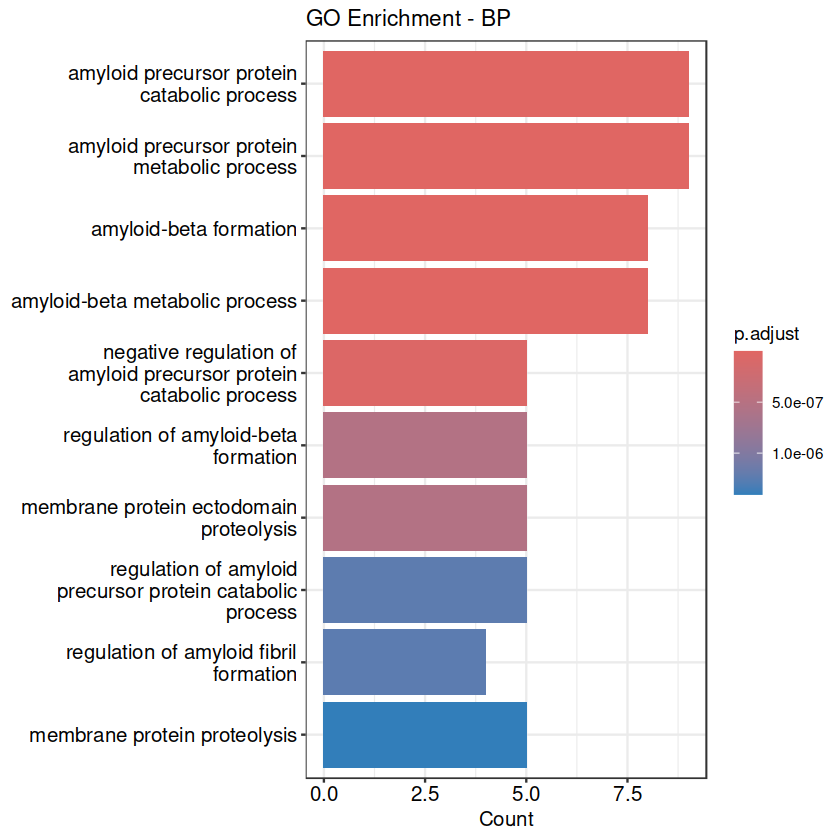

In [5]:
# Plot results
p1 <- barplot(ego, showCategory = 10, title = "GO Enrichment - BP")
p1

#### GVC list 1 - 76 genes

In [6]:
# Load gene reference
gene_ref <- fread('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5f/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list') #FIXME

In [7]:
# Load gvc list1
gvc_table1 <- fread('/restricted/projectnb/xqtl/jaempawi/xqtl/GVC - table1.tsv')  #FIXME

# Set column names from the second row and remove header rows
colnames(gvc_table1) <- gvc_table1[2,] %>% as.character()
gvc_table1 <- gvc_table1[-c(1:2),]

# Map gene names to gene reference data and add resource identifier
gvc_table1 <- gene_ref %>% 
  filter(gene_name %in% gvc_table1$`Reported Gene/ Closest gene`) %>% 
  mutate(data_resource = 'FunGen_ADSP')

In [8]:
# Run GO enrichment analysis for Biological Process (BP)
gvc_table1_ego <- enrichGO(
  gene          = gvc_table1$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)

# View results
head(gvc_table1_ego)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050435,GO:0050435,amyloid-beta metabolic process,7/73,74/21288,6.223514e-09,1.338056e-05,9.047024e-06,ENSG00000136717/ENSG00000196549/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000159640/ENSG00000064687,7
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,6/73,85/21288,4.656406e-07,4.904041e-04,3.315780e-04,ENSG00000151694/ENSG00000136717/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000064687,6
GO:0002274,GO:0002274,myeloid leukocyte activation,9/73,292/21288,6.842848e-07,4.904041e-04,3.315780e-04,ENSG00000109684/ENSG00000168421/ENSG00000095970/ENSG00000120885/ENSG00000066336/ENSG00000197943/ENSG00000103241/ENSG00000030582/ENSG00000142192,9
GO:0030183,GO:0030183,B cell differentiation,7/73,165/21288,1.568380e-06,8.430040e-04,5.699822e-04,ENSG00000203710/ENSG00000151694/ENSG00000168918/ENSG00000120899/ENSG00000066336/ENSG00000095585/ENSG00000197943,7
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,6/73,114/21288,2.625738e-06,9.624278e-04,6.507284e-04,ENSG00000151694/ENSG00000136717/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000064687,6
GO:0002275,GO:0002275,myeloid cell activation involved in immune response,6/73,115/21288,2.762813e-06,9.624278e-04,6.507284e-04,ENSG00000109684/ENSG00000095970/ENSG00000066336/ENSG00000197943/ENSG00000103241/ENSG00000030582,6


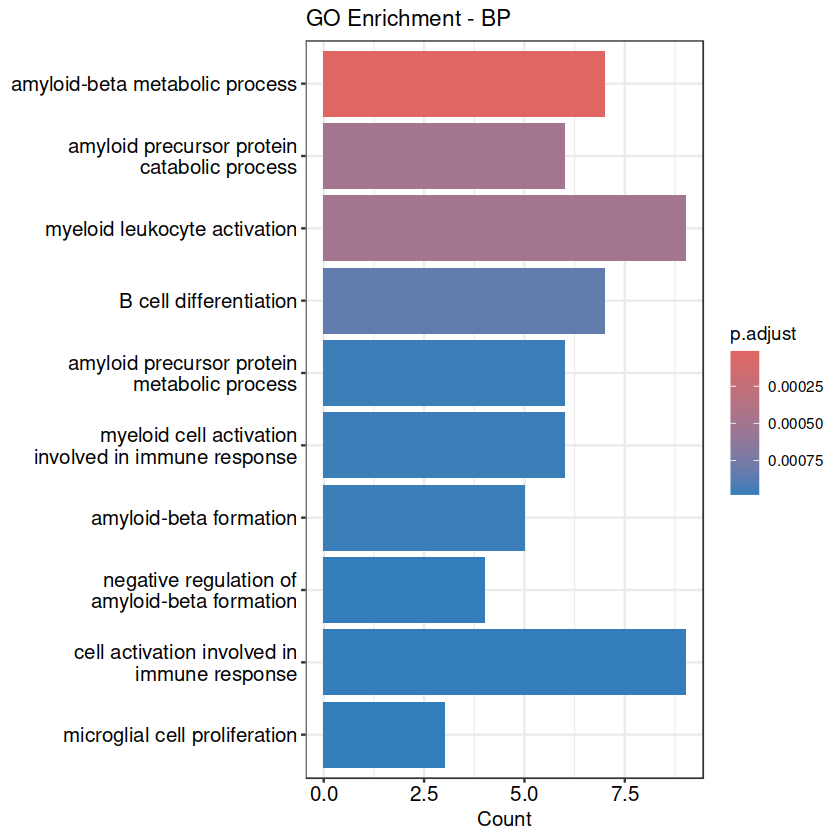

In [9]:
# Plot results
p2 <- barplot(gvc_table1_ego, showCategory = 10, title = "GO Enrichment - BP")
p2

#### Strong list - overlapped between xQTL, GVC and TWAS

In [10]:
# Intersect multiple gene_id vectors
gvc_list <- gene_list %>% filter(str_detect(data_resources, 'FunGen_AD_PI|ADSP_GVC')) # 20 genes + PIs' genes
strong_list <- Reduce(intersect, list(gvc_list$gene_id, gene_list$gene_id, twas_list$gene_id)) # the overlap between xQTL and gvc and twas

In [11]:
strong_list_ego <- enrichGO(
  gene          = strong_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)
head(strong_list_ego)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,5/21,85/21288,1.743235e-08,2.256673e-05,1.137466e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845,5
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,4/21,34/21288,3.182895e-08,2.256673e-05,1.137466e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,5/21,114/21288,7.661054e-08,3.621125e-05,1.825213e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845,5
GO:1902003,GO:1902003,regulation of amyloid-beta formation,4/21,57/21288,2.671464e-07,9.470339e-05,4.773484e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4
GO:0034205,GO:0034205,amyloid-beta formation,4/21,66/21288,4.846271e-07,1.374402e-04,6.927616e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,4/21,70/21288,6.149636e-07,1.453364e-04,7.325620e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4


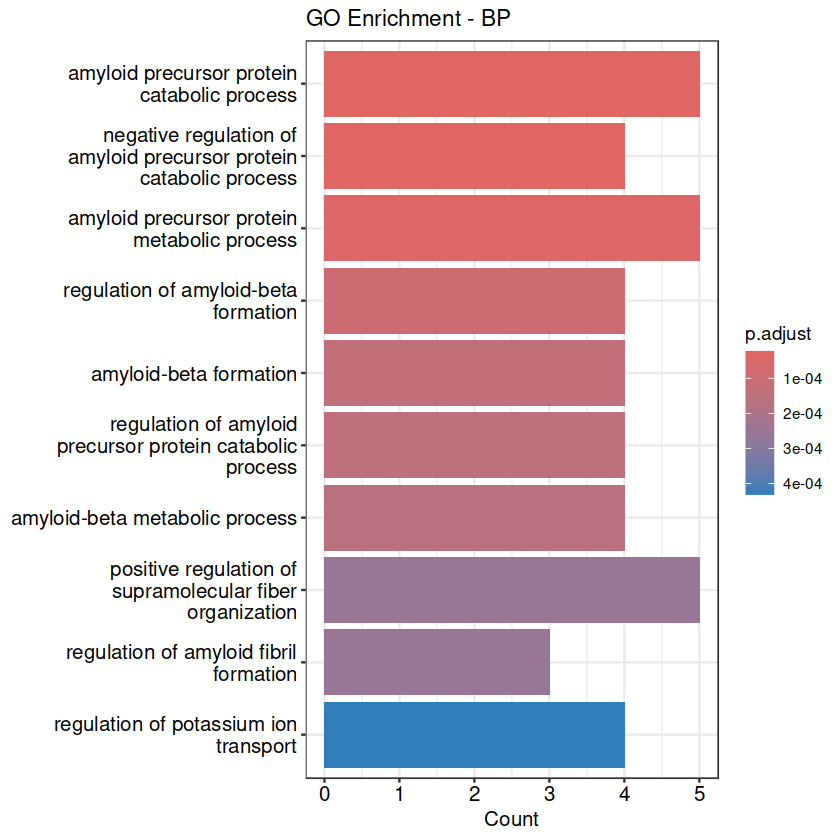

In [12]:
p3 <- barplot(strong_list_ego, showCategory = 10, title = "GO Enrichment - BP")
p3

#### xQTL list - GO enrichment

In [13]:
# Initialize STRINGdb (change species if needed, 9606 = Homo sapiens)
string_db <- STRINGdb$new(version="11.5", species=9606, score_threshold=400, input_directory="")

# Load xQTL list
xQTL_list <- gene_list %>% filter(str_detect(data_resources, 'FunGen_xQTL'))

# Load xQTL list
genes <- xQTL_list$gene_name

# Map gene names to STRING IDs
mapped_genes <- string_db$map(data.frame(gene=genes), "gene", removeUnmappedRows = TRUE)

# Retrieve interaction network for the genes
ppi_network <- string_db$get_interactions(mapped_genes$STRING_id)
genes_with_ppi <- mapped_genes %>% filter(STRING_id %in% c(ppi_network$from, ppi_network$to))

xQTL_list %>% pull(resource_in_FunGen_xQTL) %>% table
xQTL_list %>% filter(!(gene_name %in% genes_with_ppi$gene)) %>% pull(resource_in_FunGen_xQTL) %>% table # the xQTL genes not have any PPI

.
                                                  ColocBoost 
                                                         160 
                                    ColocBoost,multi_context 
                                                           2 
                         ColocBoost,multi_context,multi_gene 
                                                           1 
                                   ColocBoost,single_context 
                                                           7 
                         ColocBoost,single_context,MetaBrain 
                                                           1 
              ColocBoost,single_context,MetaBrain,multi_gene 
                                                           1 
                     ColocBoost,single_context,multi_context 
                                                          12 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           7 
ColocB

.
                                                  ColocBoost 
                                                          40 
                                   ColocBoost,single_context 
                                                           2 
                     ColocBoost,single_context,multi_context 
                                                           2 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           1 
                        ColocBoost,single_context,multi_gene 
                                                           1 
                                                   MetaBrain 
                                                           2 
                                        MetaBrain,ColocBoost 
                                                           1 
                                              single_context 
                                                           1 
      

In [14]:
xQTL_ego <- enrichGO(
  gene          = xQTL_list$gene_name,
  OrgDb         = org.Hs.eg.db,
  keyType       = "SYMBOL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
head(xQTL_ego, n=5)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0002274,GO:0002274,myeloid leukocyte activation,14/215,241/18888,7.206455e-07,0.001682472,0.001379365,GRN/TREM2/STX4/CD33/HAVCR1/CLU/NECTIN2/HAVCR2/DYSF/APP/FCER1G/RHOH/C5AR1/PLCG2,14
GO:0030100,GO:0030100,regulation of endocytosis,15/215,291/18888,1.300061e-06,0.001682472,0.001379365,ATG5/PICALM/TREM2/RIN3/SIRPB1/LILRB1/CLU/APOC1/DYSF/BIN1/DGKQ/FCER1G/PLCG2/SIRPA/APOC2,15
GO:0002281,GO:0002281,macrophage activation involved in immune response,5/215,19/18888,1.862633e-06,0.001682472,0.001379365,GRN/TREM2/HAVCR2/DYSF/PLCG2,5
GO:0045806,GO:0045806,negative regulation of endocytosis,8/215,75/18888,2.169532e-06,0.001682472,0.001379365,ATG5/PICALM/RIN3/LILRB1/APOC1/DYSF/SIRPA/APOC2,8
GO:0045785,GO:0045785,positive regulation of cell adhesion,19/215,485/18888,3.082937e-06,0.001912654,0.001568079,CBFB/NCK2/ACTL6B/CASS4/STK4/SIRPB1/CORO1A/STX4/LILRB1/ITGB1BP1/PTK2B/HAVCR2/EPHA1/STX3/SERPINF2/RHOH/CD55/SIRPA/CR1,19


In [15]:
# GO terms related to amyloid
xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid')) %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050435,GO:0050435,amyloid-beta metabolic process,6/215,65/18888,9.575398e-05,0.008486538,0.006957643,PICALM/CLU/BIN1/SORL1/APH1B/ACE,6
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,6/215,68/18888,1.233433e-04,0.008897927,0.007294917,PICALM/CLU/BIN1/SORL1/APH1B/ADAM17,6
GO:0034205,GO:0034205,amyloid-beta formation,5/215,56/18888,4.346757e-04,0.015562055,0.012758467,PICALM/CLU/BIN1/SORL1/APH1B,5
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,4/215,32/18888,4.571898e-04,0.015584647,0.012776989,PICALM/CLU/BIN1/SORL1,4
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,6/215,96/18888,8.027018e-04,0.021294972,0.017458567,PICALM/CLU/BIN1/SORL1/APH1B/ADAM17,6
GO:1905906,GO:1905906,regulation of amyloid fibril formation,3/215,17/18888,8.790662e-04,0.021814907,0.017884833,TREM2/CLU/APP,3


In [16]:
# GO terms related to lysosome
xQTL_ego %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('lysosome|lysosomal membrane|lysosomal lumen|autophagy|macroautophagy|vacuole|endosome|phagosome|lipid droplet', ignore_case = TRUE))) %>%
  head() 

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007040,GO:0007040,lysosome organization,6/215,111/18888,0.001703434,0.03108266,0.02548295,GRN/CORO1A/TMEM106B/TMEM175/ACP2/ABCA1,6
GO:0080171,GO:0080171,lytic vacuole organization,6/215,111/18888,0.001703434,0.03108266,0.02548295,GRN/CORO1A/TMEM106B/TMEM175/ACP2/ABCA1,6
GO:0007033,GO:0007033,vacuole organization,8/215,234/18888,0.005470877,0.06262236,0.05134061,GRN/ATG5/CORO1A/TMEM106B/TMEM175/ACP2/TP53INP1/ABCA1,8
GO:0035751,GO:0035751,regulation of lysosomal lumen pH,3/215,32/18888,0.005656367,0.06403668,0.05250012,GRN/TMEM106B/TMEM175,3
GO:1905671,GO:1905671,regulation of lysosome organization,2/215,12/18888,0.007895963,0.07542693,0.06183836,GRN/TMEM106B,2
GO:0061684,GO:0061684,chaperone-mediated autophagy,2/215,15/18888,0.012283347,0.09486872,0.07777761,ATG5/CLU,2


In [17]:
# GO terms related to neuron function
xQTL_ego %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('synaptic transmission|synapse organization|cognition|synaptic plasticity|neuron projection morphogenesis|axon guidance|nervous system development|modulation of chemical synaptic transmission|generation of neurons|learning or memory|neuron projection|postsynaptic membrane|dendrite|axon|cell body|postsynapse|presynapse|synaptic membrane|synapse', ignore_case = TRUE))) %>% head  

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0098814,GO:0098814,spontaneous synaptic transmission,3/215,14/18888,0.0004825692,0.01567266,0.01284914,APP/DOC2A/DOC2B,3
GO:0001771,GO:0001771,immunological synapse formation,3/215,16/18888,0.0007300409,0.02021953,0.01657687,NCK2/HAVCR2/CD2AP,3
GO:0099003,GO:0099003,vesicle-mediated transport in synapse,9/215,221/18888,0.0009980271,0.02363267,0.01937512,SLC4A8/PICALM/BIN1/DGKQ/DOC2A/STX3/CPLX1/GAK/DOC2B,9
GO:0099643,GO:0099643,signal release from synapse,6/215,144/18888,0.0061627519,0.06803152,0.05577527,SLC4A8/DYSF/DOC2A/STX3/CPLX1/DOC2B,6
GO:0002753,GO:0002753,cytoplasmic pattern recognition receptor signaling pathway,6/215,163/18888,0.0110057492,0.08984167,0.07365621,DHX33/TREM2/HAVCR2/OTULIN/SCIMP/PLCG2,6
GO:0098969,GO:0098969,neurotransmitter receptor transport to postsynaptic membrane,2/215,16/18888,0.0139338188,0.10291120,0.08437119,STX3/CPLX1,2


In [18]:
# GO terms related to lipid
xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty')) %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0033700,GO:0033700,phospholipid efflux,3/215,14/18888,0.0004825692,0.01567266,0.01284914,APOC1/ABCA1/APOC2,3
GO:0071825,GO:0071825,protein-lipid complex organization,4/215,53/18888,0.0030908703,0.04561033,0.03739339,APOC1/BIN1/ABCA1/APOC2,4
GO:0055088,GO:0055088,lipid homeostasis,7/215,176/18888,0.0040895779,0.05398243,0.04425720,POLD1/TREM2/MTCH2/THADA/TLCD3B/ABCA1/APOC2,7
GO:0065005,GO:0065005,protein-lipid complex assembly,3/215,30/18888,0.0047077831,0.05841417,0.04789054,APOC1/BIN1/ABCA1,3
GO:0046834,GO:0046834,lipid phosphorylation,2/215,11/18888,0.0066294041,0.06947436,0.05695818,AGK/DGKQ,2
GO:1905953,GO:1905953,negative regulation of lipid localization,4/215,67/18888,0.0071525138,0.07322474,0.06003291,TREM2/APOC1/ABCA1/APOC2,4


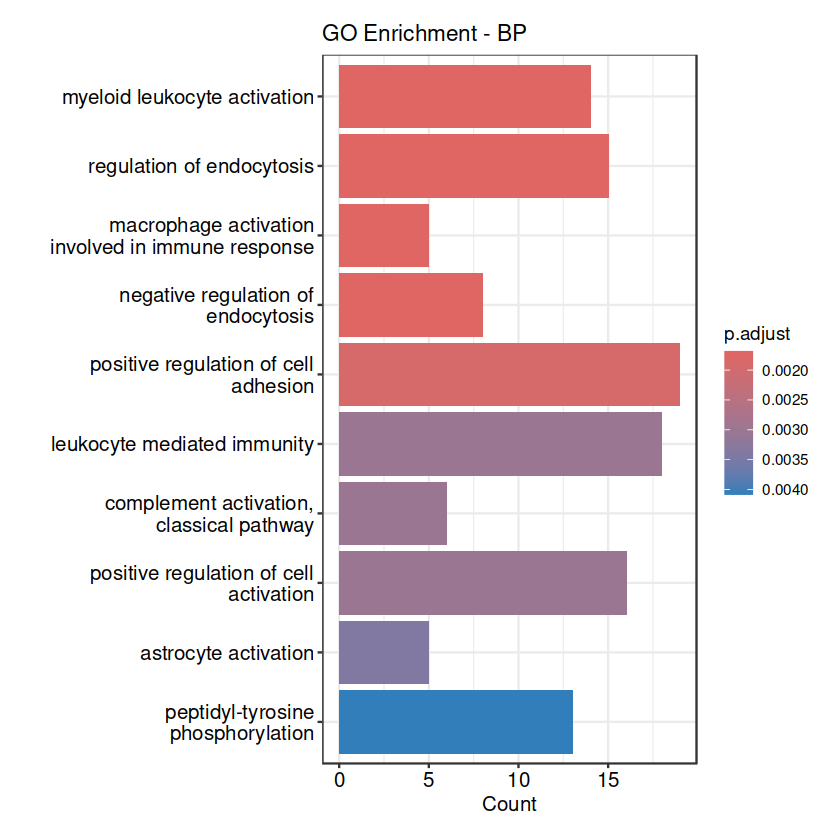

In [19]:
p4 <- barplot(xQTL_ego,
        showCategory = 10,
        title = "GO Enrichment - BP") +
        theme(plot.margin = margin(t = 5, r = 5, b = 5, l = 10, unit = "mm"))
p4

#### xQTL list - KEGG enrichment

In [20]:
entrez_ids <- bitr(xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                          qvalueCutoff = 1) 

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“2.08% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [21]:
kegg_enrich %>% head(n=4)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04610,Organismal Systems,Immune system,hsa04610,Complement and coagulation cascades,7/108,88/9447,6.227564e-05,0.008569564,0.008045394,1380/1191/5345/716/1604/728/1378,7
hsa04662,Organismal Systems,Immune system,hsa04662,B cell receptor signaling pathway,7/108,91/9447,7.720328e-05,0.008569564,0.008045394,29760/5595/10859/1380/3635/353514/5336,7
hsa04380,Organismal Systems,Development and regeneration,hsa04380,Osteoclast differentiation,8/108,143/9447,2.229312e-04,0.016496910,0.015487853,29760/54209/10326/5595/10859/353514/5336/140885,8
hsa04148,Cellular Processes,Transport and catabolism,hsa04148,Efferocytosis,8/108,157/9447,4.200806e-04,0.023314471,0.021888408,10326/5595/26762/84868/91937/6868/19/140885,8


In [22]:
# KEGG pathways related to lipid
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))

# KEGG pathways related to AD
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04979,Organismal Systems,Digestive system,hsa04979,Cholesterol metabolism,3/108,51/9447,0.02034414,0.2656705,0.2494204,341/19/344,3
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/108,15/9447,0.15852538,0.7172266,0.6733564,6483,1
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,7/108,391/9447,0.15982022,0.7172266,0.6733564,5595/1350/83464/351/6868/91252/4722,7
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/108,16/9447,0.16816059,0.7172266,0.6733564,6483,1
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/108,65/9447,0.17005472,0.7172266,0.6733564,55750/1609,2
hsa04071,Environmental Information Processing,Signal transduction,hsa04071,Sphingolipid signaling pathway,2/108,122/9447,0.40799561,0.7549129,0.7087376,5595/2207,2
hsa04932,Human Diseases,Endocrine and metabolic disease,hsa04932,Non-alcoholic fatty liver disease,2/108,157/9447,0.53896386,0.7786545,0.7310270,1350/4722,2
hsa00564,Metabolism,Lipid metabolism,hsa00564,Glycerophospholipid metabolism,1/108,103/9447,0.69601495,0.8122626,0.7625794,1609,1
hsa05417,Human Diseases,Cardiovascular disease,hsa05417,Lipid and atherosclerosis,2/108,216/9447,0.71165338,0.8122626,0.7625794,5595/19,2


,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,7/108,391/9447,0.1598202,0.7172266,0.6733564,5595/1350/83464/351/6868/91252/4722,7


In [23]:
entrez_ids %>% filter(ENTREZID == '1609') %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')
entrez_ids %>% filter(ENTREZID == '6483') %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000145214,1609,chr4,986894,986895,DGKQ


ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000157350,6483,chr16,70439236,70439237,ST3GAL2


In [24]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000102882,5595,chr16,30123505,30123506,MAPK3
ENSG00000127184,1350,chr5,86617927,86617928,COX7C
ENSG00000138613,83464,chr15,63276017,63276018,APH1B
ENSG00000142192,351,chr21,26171127,26171128,APP
ENSG00000151694,6868,chr2,9556731,9556732,ADAM17
ENSG00000165915,91252,chr11,47407131,47407132,SLC39A13
ENSG00000213619,4722,chr11,47565335,47565336,NDUFS3


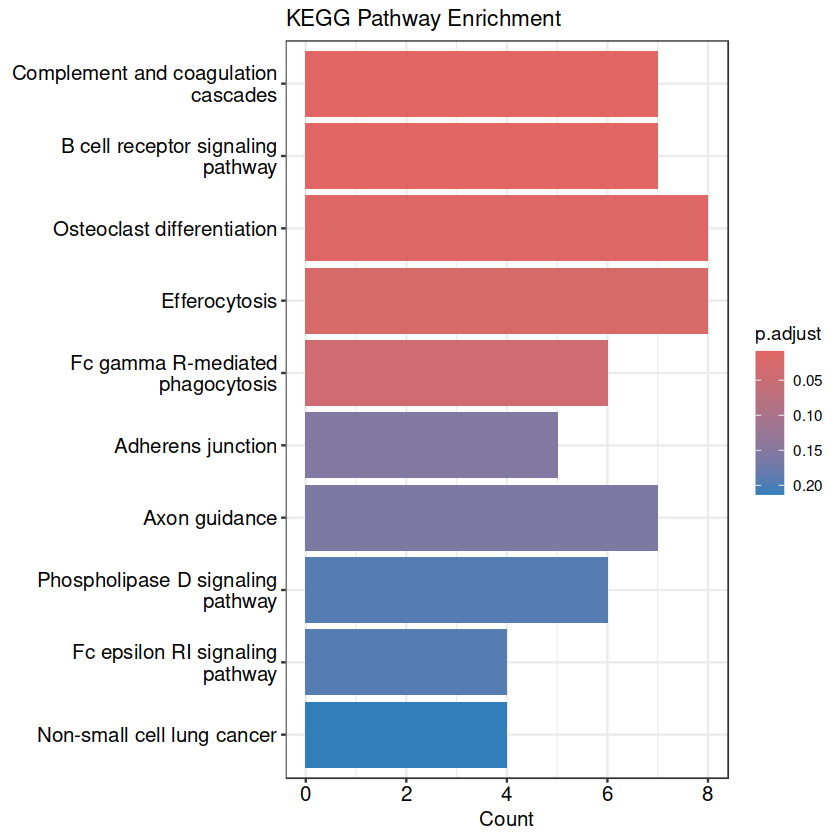

In [25]:
p5 <- barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")
p5

In [26]:
# KEGG pathways related to lysosome functions
kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('lysosome|autophagy|endocytosis|phagosome|vacuole|lipid', ignore_case = TRUE))) %>%
  head()

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04142,Cellular Processes,Transport and catabolism,hsa04142,Lysosome,5/108,133/9447,0.01803538,0.2655746,0.2493303,23062/1512/3425/53/1508,5
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/108,15/9447,0.15852538,0.7172266,0.6733564,6483,1
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/108,16/9447,0.16816059,0.7172266,0.6733564,6483,1
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/108,65/9447,0.17005472,0.7172266,0.6733564,55750/1609,2
hsa04140,Cellular Processes,Transport and catabolism,hsa04140,Autophagy - animal,3/108,169/9447,0.30462437,0.7549129,0.7087376,9474/5595/1508,3
hsa04136,Cellular Processes,Transport and catabolism,hsa04136,Autophagy - other,1/108,32/9447,0.30826072,0.7549129,0.7087376,9474,1


In [27]:
# KEGG pathways related to neuron function
kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('synapse|neuro|axon|dendrite|memory|learning|brain|glutamatergic|GABAergic|cholinergic|dopaminergic|serotonergic', ignore_case = TRUE))) %>%
  head()

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04360,Organismal Systems,Development and regeneration,hsa04360,Axon guidance,7/108,184/9447,0.005065273,0.1606415,0.1508156,8440/5595/5921/2041/3985/23365/5336,7
hsa04722,Organismal Systems,Nervous system,hsa04722,Neurotrophin signaling pathway,3/108,120/9447,0.157892330,0.7172266,0.6733564,4214/5595/5336,3
hsa04726,Organismal Systems,Nervous system,hsa04726,Serotonergic synapse,2/108,115/9447,0.379673022,0.7549129,0.7087376,5595/351,2
hsa04727,Organismal Systems,Nervous system,hsa04727,GABAergic synapse,1/108,89/9447,0.642332162,0.8122626,0.7625794,4905,1
hsa05022,Human Diseases,Neurodegenerative disease,hsa05022,Pathways of neurodegeneration - multiple diseases,5/108,483/9447,0.653400224,0.8122626,0.7625794,5595/83544/1350/351/4722,5
hsa04724,Organismal Systems,Nervous system,hsa04724,Glutamatergic synapse,1/108,116/9447,0.738679177,0.8122626,0.7625794,5595,1


#### Plot AD functional pathway - xQTL list

In [28]:
gene.data <- kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, 'Alzheimer')) %>%
  pull(geneID) %>%
  str_split('/') %>%
  unlist()

gene.data <- setNames(as.numeric(rep(1, length(gene.data))), gene.data)

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /restricted/projectnb/xqtl/jaempawi/xqtl

Info: Writing image file hsa05010..png



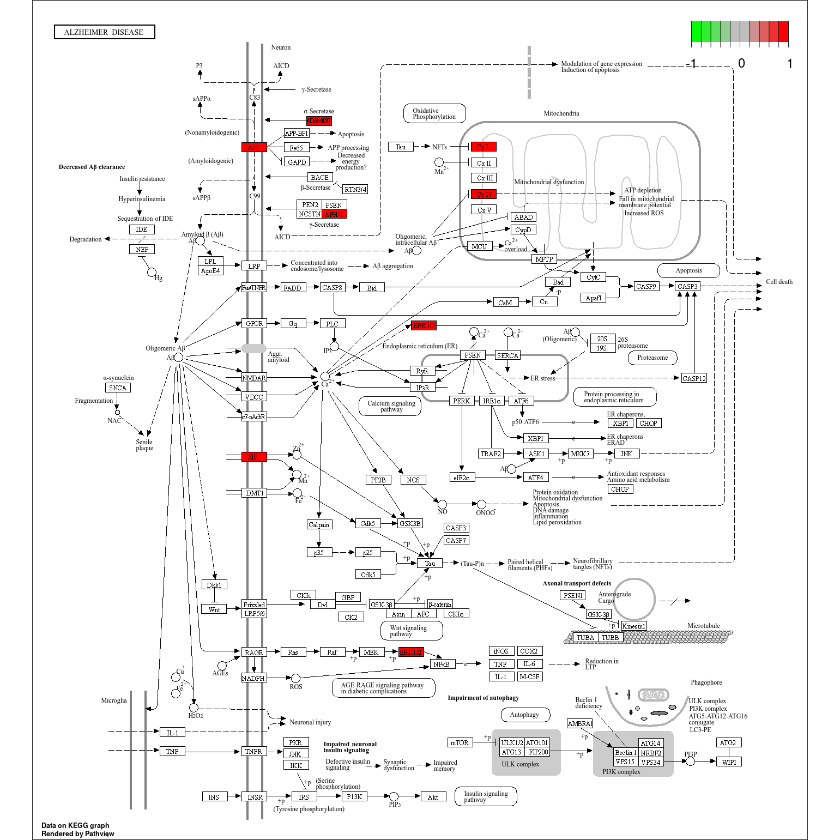

In [29]:
# Generate the pathway plot with highlighted genes
pathview(
  gene.data = gene.data,
  pathway.id = "hsa05010",
  species = "hsa",
  out.suffix = NULL,
  kegg.native = TRUE
)

p6 <- readPNG("hsa05010.xQTL_list.png")
grid.raster(p6)

#### xQTL only list - GO enrichment

In [30]:
xQTL_only <- Reduce(setdiff, list(xQTL_list$gene_id, gvc_list$gene_id, twas_list$gene_id)) # the genes unqiue from xQTL, NOT from gvc and twas
xQTL_only <- xQTL_list %>% filter(gene_id %in% xQTL_only)
xQTL_only %>% pull(resource_in_FunGen_xQTL) %>% table # check their resources from FunGen xQTL

.
                                                  ColocBoost 
                                                         116 
                         ColocBoost,multi_context,multi_gene 
                                                           1 
                                   ColocBoost,single_context 
                                                           1 
                     ColocBoost,single_context,multi_context 
                                                           4 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           2 
ColocBoost,single_context,multi_context,MetaBrain,multi_gene 
                                                           2 
                        ColocBoost,single_context,multi_gene 
                                                           2 
                                                   MetaBrain 
                                                           1 
      

In [31]:
xqtl_only_ego <- enrichGO(
  gene          = xQTL_only$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
xqtl_only_ego %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:1902017,GO:1902017,regulation of cilium assembly,5/134,78/21288,0.0001339299,0.2795117,0.2692696,ENSG00000057663/ENSG00000103540/ENSG00000136536/ENSG00000138036/ENSG00000182541,5
GO:1902018,GO:1902018,negative regulation of cilium assembly,3/134,21/21288,0.0002985075,0.3114926,0.3000786,ENSG00000103540/ENSG00000136536/ENSG00000182541,3
GO:0031338,GO:0031338,regulation of vesicle fusion,3/134,25/21288,0.0005068010,0.3220401,0.3102397,ENSG00000102879/ENSG00000168993/ENSG00000272636,3
GO:0048284,GO:0048284,organelle fusion,6/134,172/21288,0.0007799122,0.3220401,0.3102397,ENSG00000102879/ENSG00000103496/ENSG00000127419/ENSG00000140379/ENSG00000168993/ENSG00000272636,6
GO:0060271,GO:0060271,cilium assembly,9/134,401/21288,0.0010053721,0.3220401,0.3102397,ENSG00000057663/ENSG00000103540/ENSG00000112981/ENSG00000119661/ENSG00000121289/ENSG00000136536/ENSG00000138036/ENSG00000157423/ENSG00000182541,9
GO:0061098,GO:0061098,positive regulation of protein tyrosine kinase activity,3/134,33/21288,0.0011588387,0.3220401,0.3102397,ENSG00000151694/ENSG00000167191/ENSG00000187116,3


In [32]:
# GO term related to amyloid
xqtl_only_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0097242,GO:0097242,amyloid-beta clearance,1/134,46/21288,0.2523171,0.5002484,0.4819179,ENSG00000197405,1
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,1/134,85/21288,0.4159679,0.5978823,0.5759742,ENSG00000151694,1
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,1/134,114/21288,0.5141128,0.6562406,0.6321941,ENSG00000151694,1


In [33]:
amyloid_genes <- (xqtl_only_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid')) %>% pull(geneID) %>% str_split(., '/') %>% unlist )
gene_ref %>% filter(gene_id %in% amyloid_genes)

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr2,9556731,9556732,ENSG00000151694,ADAM17
chr19,47290022,47290023,ENSG00000197405,C5AR1


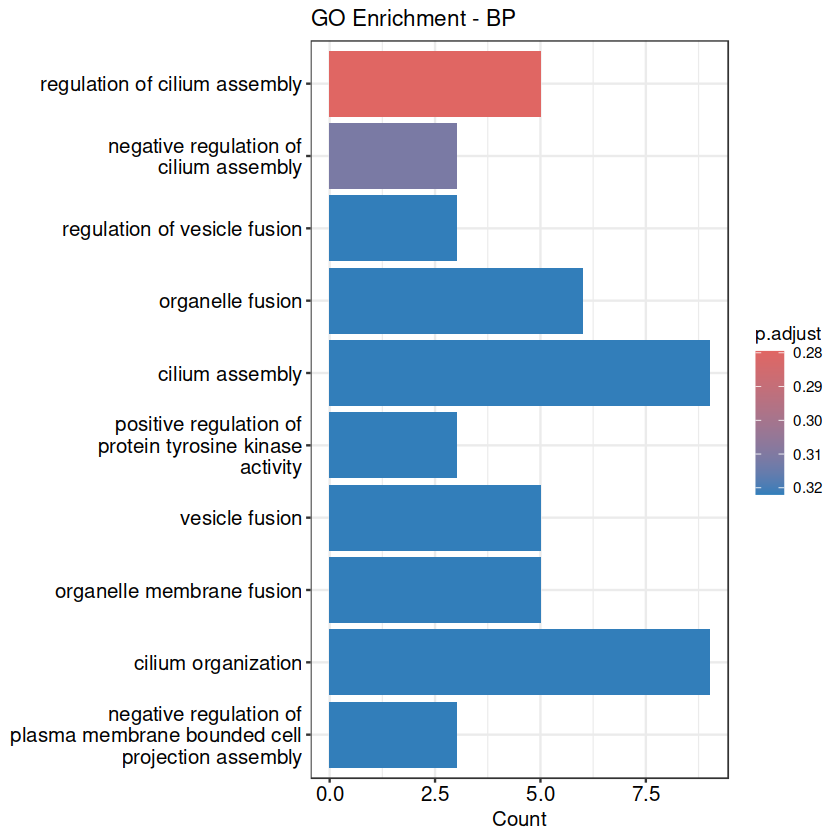

In [34]:
p7 <- barplot(xqtl_only_ego, showCategory = 10, title = "GO Enrichment - BP")
p7

#### xQTL only list - KEGG enrichment

In [35]:
entrez_ids <- bitr(xQTL_only$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(xQTL_only$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“1.32% of input gene IDs are fail to map...”


In [36]:
# KEGG pathway related to lipid
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))

# KEGG pathway related to AD
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/61,65/9447,0.06583244,0.7570456,0.7570456,55750/1609,2
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/61,15/9447,0.09266406,0.7570456,0.7570456,6483,1
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/61,16/9447,0.09853211,0.7570456,0.7570456,6483,1
hsa00564,Metabolism,Lipid metabolism,hsa00564,Glycerophospholipid metabolism,1/61,103/9447,0.48873928,0.7580112,0.7580112,1609,1
hsa04932,Human Diseases,Endocrine and metabolic disease,hsa04932,Non-alcoholic fatty liver disease,1/61,157/9447,0.64140700,0.7889887,0.7889887,1350,1
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9447,0.72521663,0.8303681,0.8303681,1350/6868,2


,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9447,0.7252166,0.8303681,0.8303681,1350/6868,2


In [37]:
# KEGG pathway related to neurogenerative
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(subcategory, 'Neurodegenerative'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05016,Human Diseases,Neurodegenerative disease,hsa05016,Huntington disease,3/61,311/9447,0.3255188,0.7570456,0.7570456,7019/83544/1350,3
hsa05014,Human Diseases,Neurodegenerative disease,hsa05014,Amyotrophic lateral sclerosis,2/61,371/9447,0.6976572,0.8203932,0.8203932,83544/1350,2
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9447,0.7252166,0.8303681,0.8303681,1350/6868,2
hsa05022,Human Diseases,Neurodegenerative disease,hsa05022,Pathways of neurodegeneration - multiple diseases,2/61,483/9447,0.8264184,0.8448696,0.8448696,83544/1350,2
hsa05012,Human Diseases,Neurodegenerative disease,hsa05012,Parkinson disease,1/61,271/9447,0.8315646,0.8448696,0.8448696,1350,1
hsa05020,Human Diseases,Neurodegenerative disease,hsa05020,Prion disease,1/61,278/9447,0.8392505,0.8459112,0.8459112,1350,1


In [38]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000127184,1350,chr5,86617927,86617928,COX7C
ENSG00000151694,6868,chr2,9556731,9556732,ADAM17


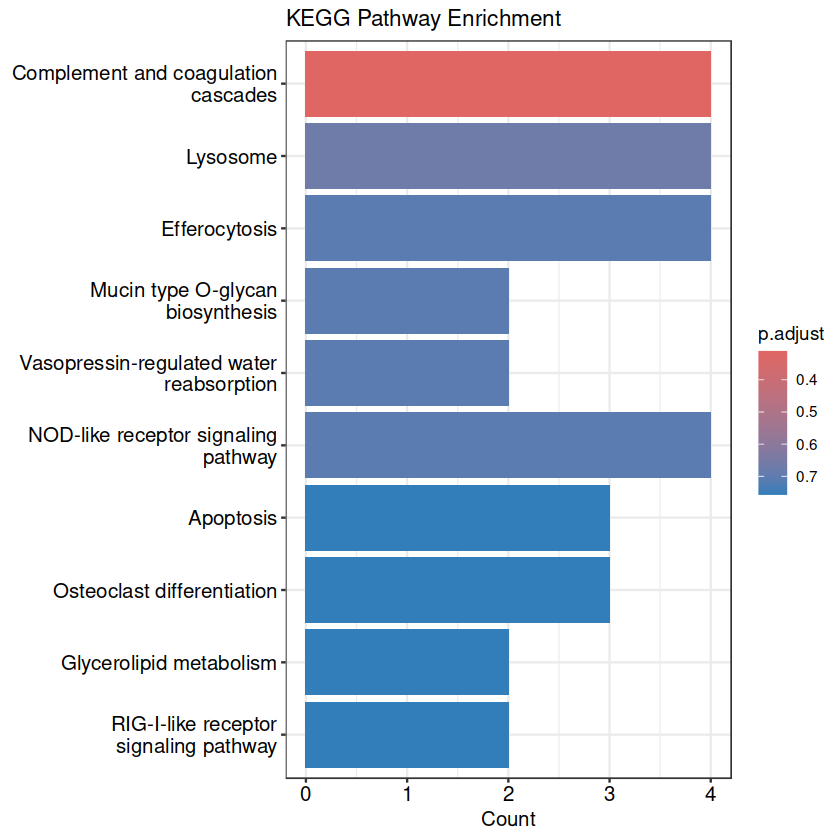

In [39]:
p8 <- barplot(kegg_enrich_only, showCategory = 10, title = "KEGG Pathway Enrichment")
p8

In [40]:
# xQTL list
gene.data 

5595  1350 83464   351  6868 91252  4722 
    1     1     1     1     1     1     1

In [41]:
gene.data[names(gene.data) %in% c('1350', '6868')] <- 2

# xQTL list highlight xQTL only
gene.data_xqtl_only <- gene.data 
gene.data_xqtl_only 

5595  1350 83464   351  6868 91252  4722 
    1     2     1     1     2     1     1

#### Plot AD functional pathway - xQTL only list

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /restricted/projectnb/xqtl/jaempawi/xqtl

Info: Writing image file hsa05010.xQTL_only.png



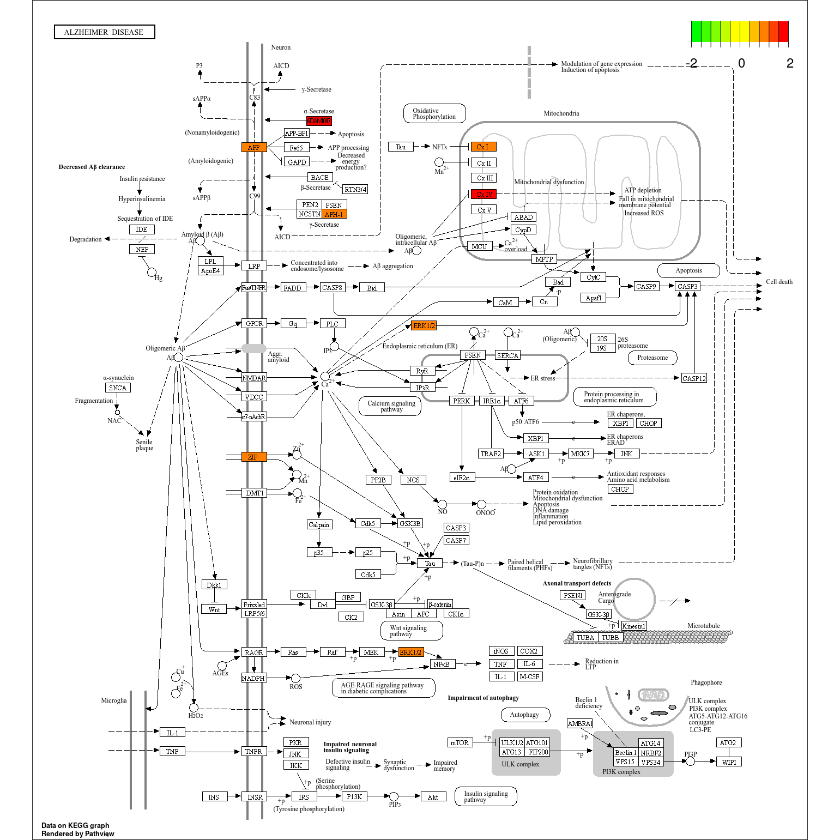

In [42]:
# Make sure gene.data is numeric named vector with correct format and proper range for color mapping
pathview(
  gene.data = gene.data_xqtl_only,
  pathway.id = "hsa05010",
  species = "hsa",
  out.suffix = "xQTL_only",
  kegg.native = TRUE,
  limit = list(gene = max(abs(gene.data))),  # set gene color scale limit properly
  low = "green",
  mid = "yellow",
  high = "red",
  na.col = "white"   # color for genes without data
)

p9 <- readPNG("hsa05010.xQTL_only.png")
grid.raster(p9)

#### TWAS only list 

In [44]:
twas_diff_list <- Reduce(setdiff, list(twas_list$gene_id, gene_list$gene_id, gvc_list$gene_id)) # the genes unqiue from twas, NOT from gvc and xQTL

In [45]:
twas_diff_ego <- enrichGO(
  gene          = twas_diff_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
twas_diff_ego %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030198,GO:0030198,extracellular matrix organization,14/242,387/21288,0.0001491059,0.1338011,0.1271048,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0043062,GO:0043062,extracellular structure organization,14/242,388/21288,0.0001531484,0.1338011,0.1271048,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0045229,GO:0045229,external encapsulating structure organization,14/242,390/21288,0.0001615187,0.1338011,0.1271048,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0051458,GO:0051458,corticotropin secretion,3/242,11/21288,0.0002237980,0.1338011,0.1271048,ENSG00000120088/ENSG00000166128/ENSG00000263715,3
GO:0009743,GO:0009743,response to carbohydrate,11/242,264/21288,0.0002314097,0.1338011,0.1271048,ENSG00000010310/ENSG00000012061/ENSG00000012232/ENSG00000075391/ENSG00000121691/ENSG00000127616/ENSG00000136504/ENSG00000145242/ENSG00000156711/ENSG00000169375/ENSG00000225697,11
GO:0009650,GO:0009650,UV protection,3/242,12/21288,0.0002958951,0.1425721,0.1354369,ENSG00000012061/ENSG00000104884/ENSG00000121691,3


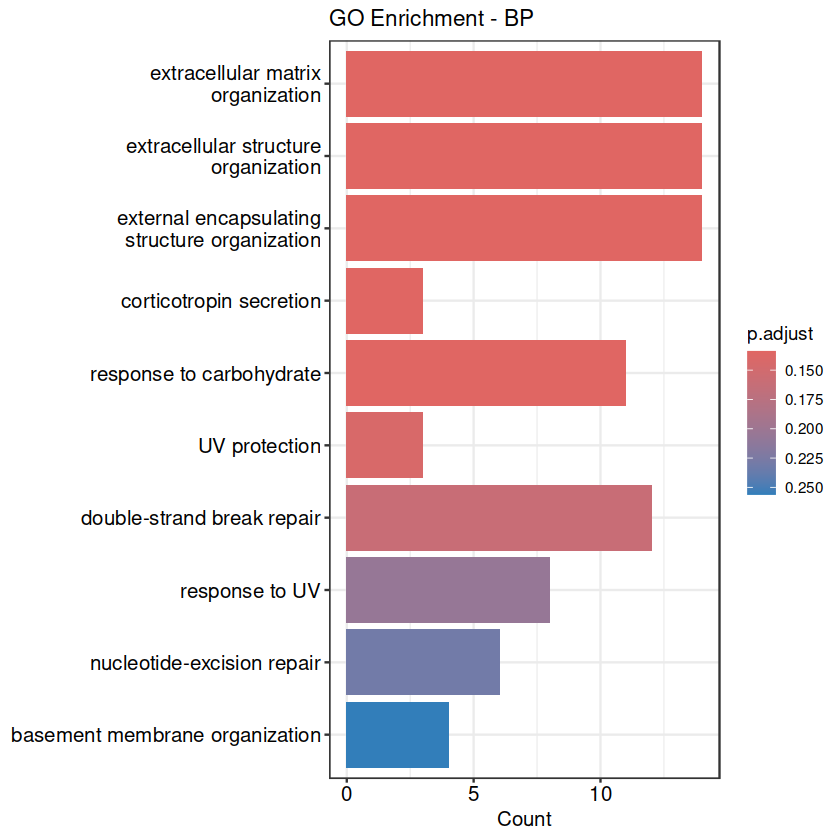

In [46]:
p10 <- barplot(twas_diff_ego, showCategory = 10, title = "GO Enrichment - BP")
p10

In [47]:
# GO terms related to amyloid
twas_diff_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050435,GO:0050435,amyloid-beta metabolic process,2/242,74/21288,0.2056536,0.6088354,0.5783654,ENSG00000119912/ENSG00000125744,2
GO:1902430,GO:1902430,negative regulation of amyloid-beta formation,1/242,31/21288,0.2985986,0.6275205,0.5961154,ENSG00000125744,1
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,1/242,34/21288,0.3222833,0.6456832,0.6133691,ENSG00000125744,1
GO:0097242,GO:0097242,amyloid-beta clearance,1/242,46/21288,0.4093186,0.6719534,0.6383245,ENSG00000119912,1
GO:1902003,GO:1902003,regulation of amyloid-beta formation,1/242,57/21288,0.4792814,0.6924550,0.6578001,ENSG00000125744,1
GO:1990000,GO:1990000,amyloid fibril formation,1/242,61/21288,0.5026217,0.7019706,0.6668395,ENSG00000186868,1
GO:0034205,GO:0034205,amyloid-beta formation,1/242,66/21288,0.5303371,0.7122686,0.6766221,ENSG00000125744,1
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,1/242,70/21288,0.5513976,0.7232716,0.6870744,ENSG00000125744,1
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,1/242,85/21288,0.6223320,0.7584999,0.7205397,ENSG00000125744,1


#### multi gene case - YPEL3

In [48]:
# multi_gene_list <- c('YPEL3', 'INO80E', 'DOC2A', 'MAPK3', 'CORO1A', 'BCKDK', 'TLCD3B', 'ZNF267')
multi_gene_list <- c('ENSG00000090238','ENSG00000169592','ENSG00000149927','ENSG00000102879','ENSG00000149930','ENSG00000149932','ENSG00000102882','ENSG00000103507','ENSG00000149926','ENSG00000185947', 'ENSG00000285043', 'ENSG00000052344')

In [49]:
gene_ref %>% filter(gene_id %in% multi_gene_list)

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr16,29940884,29940885,ENSG00000149932,TMEM219
chr16,29973867,29973868,ENSG00000149930,TAOK2
chr16,29995714,29995715,ENSG00000169592,INO80E
chr16,30023269,30023270,ENSG00000149927,DOC2A
chr16,30052977,30052978,ENSG00000149926,TLCD3B
chr16,30053089,30053090,ENSG00000285043,AC093512.2
chr16,30096914,30096915,ENSG00000090238,YPEL3
chr16,30123505,30123506,ENSG00000102882,MAPK3
chr16,30182826,30182827,ENSG00000102879,CORO1A


In [50]:
multigene_ego <- enrichGO(
  gene          = multi_gene_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
multigene_ego %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0031338,GO:0031338,regulation of vesicle fusion,2/11,25/21288,7.235168e-05,0.02229795,0.01339537,ENSG00000149927/ENSG00000102879,2
GO:0032872,GO:0032872,regulation of stress-activated MAPK cascade,2/11,35/21288,1.430935e-04,0.02229795,0.01339537,ENSG00000149930/ENSG00000102882,2
GO:0070302,GO:0070302,regulation of stress-activated protein kinase signaling cascade,2/11,38/21288,1.689239e-04,0.02229795,0.01339537,ENSG00000149930/ENSG00000102882,2
GO:0051403,GO:0051403,stress-activated MAPK cascade,2/11,50/21288,2.933612e-04,0.02611401,0.01568784,ENSG00000149930/ENSG00000102882,2
GO:0098927,GO:0098927,vesicle-mediated transport between endosomal compartments,2/11,53/21288,3.297224e-04,0.02611401,0.01568784,ENSG00000102879/ENSG00000102882,2
GO:0031098,GO:0031098,stress-activated protein kinase signaling cascade,2/11,59/21288,4.087094e-04,0.02697482,0.01620497,ENSG00000149930/ENSG00000102882,2


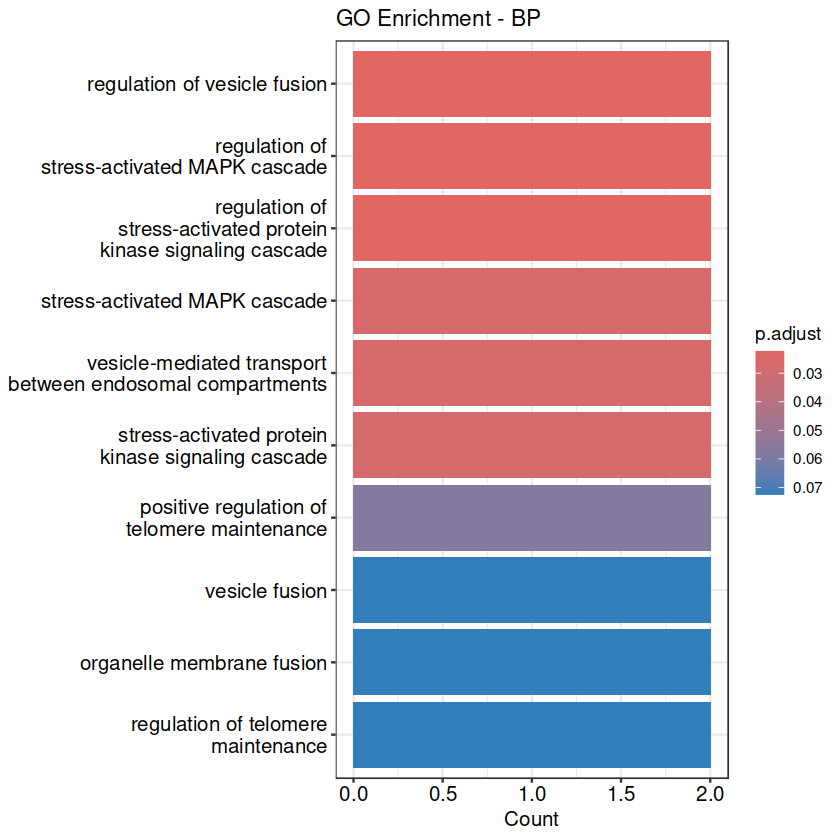

In [51]:
p11 <- barplot(multigene_ego, showCategory = 10, title = "GO Enrichment - BP")
p11

In [52]:
multigene_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [53]:
entrez_ids <- bitr(multi_gene_list, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_YPEL3_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                          qvalueCutoff = 1)
kegg_enrich_YPEL3_only %>% head

'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05152,Human Diseases,Infectious disease: bacterial,hsa05152,Tuberculosis,2/5,182/9447,0.003552830,0.1148963,0.08667617,11151/5595,2
hsa04010,Environmental Information Processing,Signal transduction,hsa04010,MAPK signaling pathway,2/5,300/9447,0.009432492,0.1148963,0.08667617,9344/5595,2
hsa05216,Human Diseases,Cancer: specific types,hsa05216,Thyroid cancer,1/5,37/9447,0.019434222,0.1148963,0.08667617,5595,1
hsa04960,Organismal Systems,Excretory system,hsa04960,Aldosterone-regulated sodium reabsorption,1/5,38/9447,0.019955245,0.1148963,0.08667617,5595,1
hsa05219,Human Diseases,Cancer: specific types,hsa05219,Bladder cancer,1/5,41/9447,0.021516986,0.1148963,0.08667617,5595,1
hsa04930,Human Diseases,Endocrine and metabolic disease,hsa04930,Type II diabetes mellitus,1/5,47/9447,0.024634496,0.1148963,0.08667617,5595,1


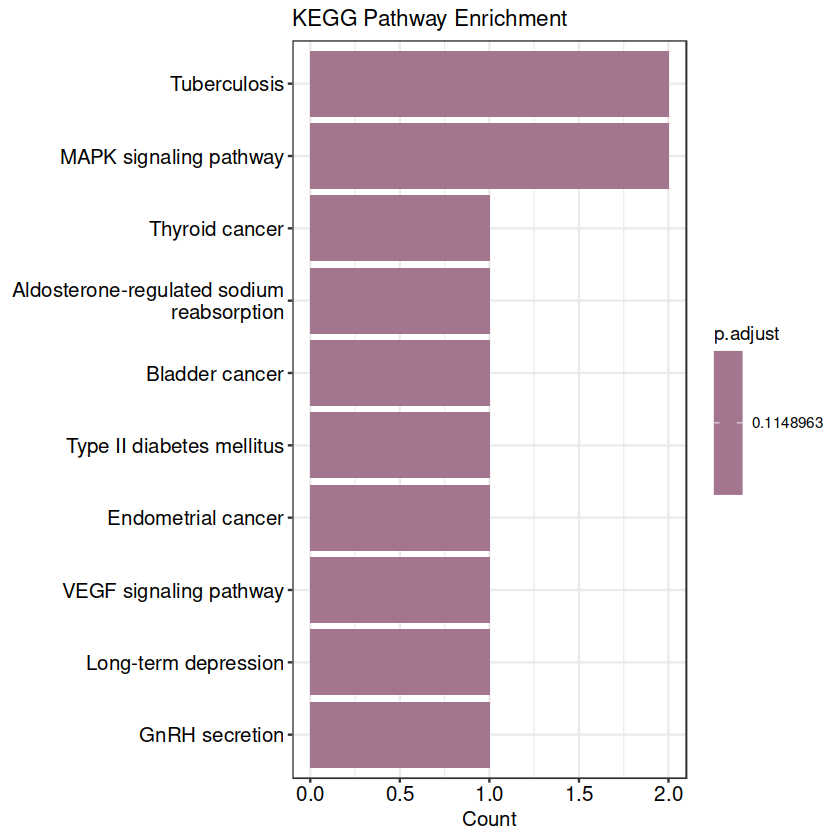

In [54]:
p12 <- barplot(kegg_enrich_YPEL3_only, showCategory = 10, title = "KEGG Pathway Enrichment")
p12

#### multi gene case - NBEAL1

In [55]:
multi_gene_list2 <- c('WDR81', 'TSC22D4', 'ICA1L', 'FAM117B', 'NBEAL1', 'CARF', 'WDR12', "DHX33", "EMG1", "DYSF")
multi_gene_list2 <- gene_ref %>% filter(gene_name %in% multi_gene_list2) %>% pull(gene_id)

In [56]:
multigene_ego2 <- enrichGO(
  gene          = multi_gene_list2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
multigene_ego2 %>% as.data.frame %>% arrange(desc(Count))

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006364,GO:0006364,rRNA processing,2/9,249/21288,0.004646887,0.07148102,0.03983463,ENSG00000138442/ENSG00000126749,2
GO:0016072,GO:0016072,rRNA metabolic process,2/9,294/21288,0.006418484,0.07148102,0.03983463,ENSG00000138442/ENSG00000126749,2
GO:0042254,GO:0042254,ribosome biogenesis,2/9,359/21288,0.009440409,0.07148102,0.03983463,ENSG00000138442/ENSG00000126749,2
GO:0034470,GO:0034470,ncRNA processing,2/9,482/21288,0.016575172,0.07254183,0.04042579,ENSG00000138442/ENSG00000126749,2
GO:0070475,GO:0070475,rRNA base methylation,1/9,11/21288,0.004641777,0.07148102,0.03983463,ENSG00000126749,1
GO:0035973,GO:0035973,aggrephagy,1/9,16/21288,0.006745337,0.07148102,0.03983463,ENSG00000167716,1
GO:0000463,GO:0000463,"maturation of LSU-rRNA from tricistronic rRNA transcript (SSU-rRNA, 5.8S rRNA, LSU-rRNA)",1/9,17/21288,0.007165575,0.07148102,0.03983463,ENSG00000138442,1
GO:0042117,GO:0042117,monocyte activation,1/9,18/21288,0.007585654,0.07148102,0.03983463,ENSG00000135636,1
GO:0007000,GO:0007000,nucleolus organization,1/9,19/21288,0.008005576,0.07148102,0.03983463,ENSG00000126749,1


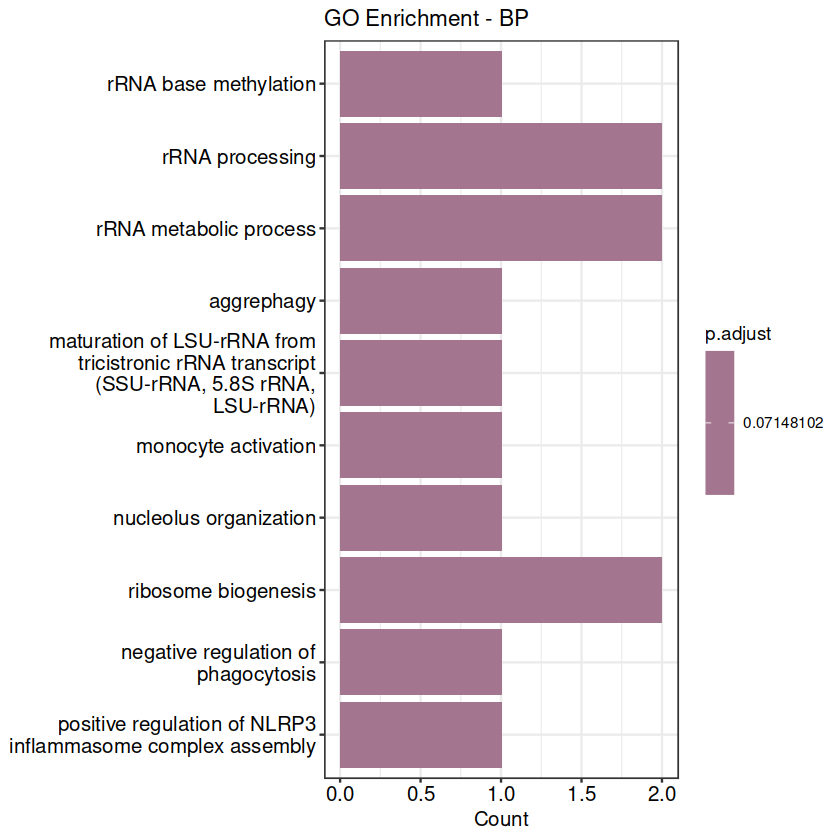

In [57]:
p13 <- barplot(multigene_ego2, showCategory = 10, title = "GO Enrichment - BP")
p13

In [58]:
entrez_ids <- bitr(multi_gene_list2, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_NBEAL1_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)
kegg_enrich_NBEAL1_only %>% head

'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
hsa04621,Organismal Systems,Immune system,hsa04621,NOD-like receptor signaling pathway,1/2,189/9447,0.03961452,0.03961452,NA,56919,1
